# Определение перспективного тарифа для телеком компании

Нам предстоит проанализировать тарифы федерального оператора сотовой связи компании «Мегалайн». В нашем распоряжении данные о небольшой выборке клиентов за 2018 год. <b>Главная задача - определить какой тариф коммерчески выгоднее для компании</b>, с целью корректировки рекламного бюджета. Тарифов два: "Смарт" и "Ультра".

Нам доступно 5 видов данных по тарифам: информация о пользователях, информация о звонках, информация о сообщениях, информация об интернет-сессиях, информация о тарифах.

В цели данного исследования входят: поиск аномалий и ошибок, анализ использования включенных в тарифный план опций, анализ расходов на превышения опций в тарифных планах, определение различий между поведением пользователями с разными тарифами, проверка статистических гипотез о коммерческой выгоде.

Данное исследование разделим на несколько шагов.<br>
### <a href='#section0'>0. Импорт файлов и библиотек<br>
### <a href='#section1'>1. Получение общей информации</a><br>
### <a href='#section2'>2. Предобработка данных</a><br>
#### <a href='#section21'>2.1. Изучение пропусков и ошибок</a><br>
#### <a href='#section22'>2.2. Заполнение пропусков и исправление ошибок</a><br>
#### <a href='#section23'>2.3. Изменение типов данных</a><br>
### <a href='#section3'>3. Обогащение данных</a><br>
#### <a href='#section31'>3.1. Подсчет количества сделанных звонков и израсходованных минут разговора по месяцам на каждого пользователя</a><br>
#### <a href='#section32'>3.2. Подсчет количества отправленных сообщений по месяцам на каждого пользователя</a><br>
#### <a href='#section33'>3.3. Определение объема израсходованного интернет-трафика по месяцам на каждого пользователя</a><br>
#### <a href='#section34'>3.4. Определение помесячной выручки с каждого пользователя</a><br>
### <a href='#section4'>4. Анализ поведения клиентов</a><br>
#### <a href='#section41'>4.1. Сколько минут разговора в месяц требуется пользователям каждого тарифа?</a><br>
#### <a href='#section42'>4.2. Сколько сообщений в месяц требуется пользователям каждого тарифа?</a><br>
#### <a href='#section43'>4.3. Какой объем интернет-трафика в месяц требуется пользователям каждого тарифа?</a><br>
### <a href='#section5'>5. Проверка гипотез</a><br>
#### <a href='#section51'>5.1. Нулевая гипотеза 1: средняя выручка пользователей тарифов «Ультра» и «Смарт» равна</a><br>
#### <a href='#section52'>5.2. Нулевая гипотеза 2: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов</a><br>
### <a href='#section6'>Общий вывод</a>

### <a id='section0'>0. Импорт файлов и библиотек</a>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
data_calls = pd.read_csv('/datasets/calls.csv', sep=',', index_col=0).reset_index()
data_internet = pd.read_csv('/datasets/internet.csv', sep=',', index_col=0).reset_index()
data_messages = pd.read_csv('/datasets/messages.csv', sep=',', index_col=0).reset_index()
data_tariffs = pd.read_csv('/datasets/tariffs.csv', sep=',', index_col=0).reset_index()
data_users = pd.read_csv('/datasets/users.csv', sep=',', index_col=0).reset_index()

### <a id='section1'>1. Получение общей информации</a>

In [2]:
#Получаем общее представление о датасетах и основные статистические данные
all_data = [data_calls, data_internet, data_messages, data_tariffs, data_users]
for x in all_data:
    display(x.head(10))
    print()
    x.info()
    print()
    display(x.describe())
    print()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB



,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


,index,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
index           149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB



,index,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB



,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes



,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB



,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [3]:
#Проверяем, встречаются ли нормальные значения data_internet['mb_used'] в те же даты, что и аномальные значения
display(data_internet[(data_internet['user_id'] == 1000) & (data_internet['session_date'] == '2018-08-28')])

,index,id,mb_used,session_date,user_id
11,11,1000_11,0.00,2018-08-28,1000
27,27,1000_27,799.91,2018-08-28,1000
35,35,1000_35,660.31,2018-08-28,1000


In [4]:
#Проверяем, все ли из 500 пользователей отправляют сообщения
display(len(data_messages.groupby('user_id')))

426

In [5]:
#Определяем среднее значение отправленных сообщений каждым пользователем выборки
display(len(data_messages)/len(data_messages.groupby('user_id')))

288.8169014084507

In [6]:
#Опделеяем какой тариф преобладает
display(data_users.pivot_table(index='tariff', values ='user_id', aggfunc='count'))

,user_id
tariff,
smart,351
ultra,149


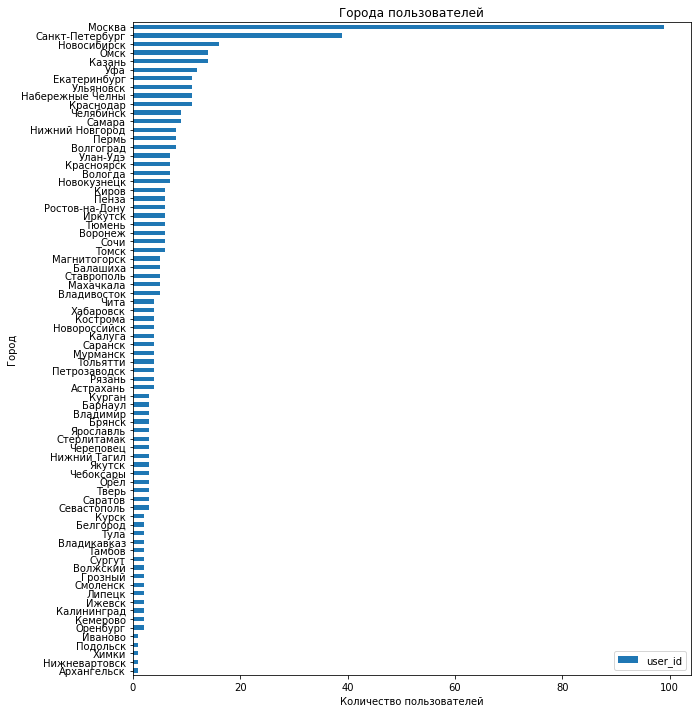

In [7]:
#Определяем, в каких городах находятся пользователи
data_users.pivot_table(index='city', values ='user_id', aggfunc='count').sort_values(by='user_id', ascending=True).plot.barh(figsize=(10,12))
plt.title('Города пользователей')
plt.xlabel('Количество пользователей')
plt.ylabel('Город')
plt.show()

### Вывод

В data_calls представлено 202607 наблюдений звонков. Аномальными значениями являются продолжительность звонков 0.00: это могут быть исходящие вызовы, для которых не успело установиться соединение. Продолжительность 50% звонков составляет от 1.30 до 10.70, при этом медианное значение 6.00. Распределение скошено вправо, так как среднее значение больше медианного, что говорит о наличии большого количества продолжительных вызовов.

В data_internet представлено 149396 наблюдений интернет-сессий. Аномальными значениями являются использование 0.00 мегабайтов во время интернет-сессии. Это могут быть временные проблемы оборудования у пользователя/провайдера, потому как в эту же дату у того же пользователя случаются интернет-сессии с нормальными показателями использования мегабайтов. Использованные мегабайты в 50% сессий находятся в диапазоне от 138.18 до 559.55, медианное значение - 348.01. Распределение скошено вправо, так как среднее значение больше медианного, что говорит о наличии значительного количества интернет-сессий с расходованием большого количества мегабайтов.

В data_messages представлено 123036 наблюдений отправленных сообщений. Только 426 из 500 пользователей выборки пользуются услугой сообщений с разной частотой, в среднем 288 сообщений.

В data_tarrifs представлена информация о тарифах. В бюджетный тариф 'smart' в месяц включено 50 сообщений, 15360 мегабайт интернета, 500 минут и пользователи платят за этот тариф 550 рублей в месяц. Опции за рамками данного тарифа оплачиваются следующим образом: 200 рублей за гигабайт, 3 рубля за сообщения, 3 рубля за минуту. В свою очередь в тариф 'ultra' в месяц включены 1000 сообщений, 30720 мегабайт интернета, 3000 минут и пользователи платят за этот тариф 1950 рублей в месяц. Опции за рамками данного тарифа оплачиваются следующим образом: 150 рублей за гигабайт, 1 рубль за сообщения, 1 рубль за минуту.

В data_users представлены следующие данные о пользователях, которые совершают звонки, пользуются интернетом и отправляют сообщения: возраст, имя, фамилия, город, дата начала пользования тарифом, дата отключения от тарифа. 38 пользователей уже отключились от имеющегося тарифа. Бюджетный тариф smart преобладает: 349 из 500 пользователей выбрали его. Топ-5 городов, где находятся пользователи выборки это Москва, Санкт-Петербург, Новосибирск, Омск, Казань.

### <a id='section2'>2. Предобработка данных</a>

#### <a id='section21'>2.1. Изучение пропусков и ошибок</a><br>

In [8]:
#Изучаем пропуски в представленных таблицах
print(' пропуски в data_calls:', data_calls.isna().sum().sum(), '\n', 'пропуски в data_internet:', data_internet.isna().sum().sum(), '\n', 'пропуски в data_messages:', data_messages.isna().sum().sum(), '\n', 'пропуски в data_tariffs:', data_tariffs.isna().sum().sum(), '\n', 'пропуски в data_users:', data_users.isna().sum().sum())

 пропуски в data_calls: 0 
 пропуски в data_internet: 0 
 пропуски в data_messages: 0 
 пропуски в data_tariffs: 0 
 пропуски в data_users: 462


In [9]:
#Изучаем таблицу data_users
display(data_users.isna().head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,False,False,True,False,False,False,False,False
1,False,False,True,False,False,False,False,False
2,False,False,True,False,False,False,False,False
3,False,False,True,False,False,False,False,False
4,False,False,True,False,False,False,False,False


Пропуски в таблицу data_users относятся к столбцу 'churn_date' и означают, что отказ пользователя от тарифа еще не наступил. Можно будет заменить использование тарифа в настоящий момент на '0', для дальнейшей работы с данными.

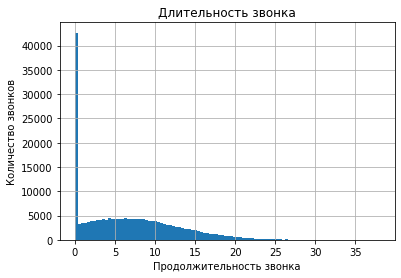

In [10]:
#Изучаем аномальные значения в таблице data_calls
data_calls['duration'].hist(bins=100)
plt.title('Длительность звонка')
plt.xlabel('Продолжительность звонка')
plt.ylabel('Количество звонков')
plt.show()

Строки с нулевыми значениями необходимо исключить, поскольку в наши задачи не входит исследование данной аномалии и их отсутствие не повлияет на конечные результаты.

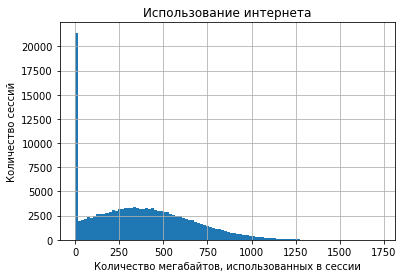

In [11]:
#Изучаем аномальные значения в таблице data_internet
data_internet['mb_used'].hist(bins=100)
plt.title('Использование интернета')
plt.xlabel('Количество мегабайтов, использованных в сессии')
plt.ylabel('Количество сессий')
plt.show()

Строки с нулевыми значениями необходимо исключить, поскольку в наши задачи не входит исследование данной аномалии и их отсутствие не повлияет на конечные результаты.

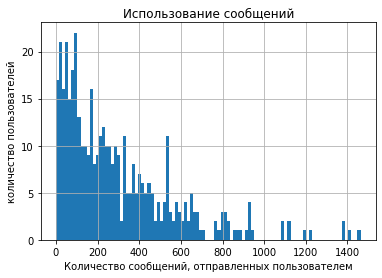

In [12]:
#Изучаем аномальные значения в таблице data_messages
data_messages.pivot_table(index='user_id', values='id', aggfunc='count').hist(bins=100)
plt.title('Использование сообщений')
plt.xlabel('Количество сообщений, отправленных пользователем')
plt.ylabel('количество пользователей')
plt.show()

In [13]:
#Сгруппируем сообщения по пользоавателям
display(data_messages.groupby('user_id')[['id']].agg(['count']))

,id
,count
user_id,
1000,496
1002,70
1003,380
1004,1192
1005,552
...,...
1495,340
1496,468


В таблице data_messages есть аномальные пиковые значения, но мы не будем их редактировать. Вероятно, они относятся к особенностям отдельных пользователей или к пограничным значениям тарифа (например, 500). В дальнейшем, мы рассмотрим эту ситуацию комплексно, когда будем анализировать особенности поведения. В таблицах data_tariffs и data_users нет аномальных значений.

#### <a id='section22'>2.2. Заполнение пропусков и исправление ошибок</a><br>

In [14]:
#Исключаем строки с нулевыми значениями в data_calls['duration']
data_calls = data_calls.loc[data_calls['duration'] != 0]
#Исключаем строки с нулевыми значениями в data_internet['mb_used']
data_internet = data_internet.loc[data_internet['mb_used'] != 0]

Ошибки исправлены в таблицах data_calls, data_internet исправлены.

#### <a id='section23'>2.3. Изменение типов данных</a><br>

In [15]:
#Приводим столбцы с датами к формату datetime
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d')

In [16]:
#Округляем до целого вверх значения продолжительности звонка, мегабайт в интернет-сессии, поскольку пользователи платят именно за целые мегабайты
data_calls['duration'] = np.ceil(data_calls['duration'])
data_calls['duration'] = data_calls['duration'].astype('int')
data_internet['mb_used'] = np.ceil(data_internet['mb_used'])
data_internet['mb_used'] = data_internet['mb_used'].astype('int')

Столбцы с датами в таблицах data_calls, data_internet, data_messages, data_users в приведены к формату datetime, значения столбца 'duration' в data_calls и столбца 'mb_used' в data_internet округлены до целого и приведены к формату int.

In [17]:
#Заменяем NA значения в столбце data_users['churn_date'] на 0
data_users['churn_date'].fillna(0, inplace=True)

### Вывод

Исключены строки с нулевыми значениями продолжительности звонков и мегабайт в интернет-сессии. Значения продолжительности звонков и мегабайт округлены до целого вверх и приведены к формату int. Недоступные значения отказа от тарифа (ввиду того, что тариф еще активен) заменены на 0. В столбцах с датами во всех таблицах формат заменен на datetime.

### <a id='section3'>3. Обогащение данных</a><br>

#### <a id='section31'>3.1. Подсчет количества сделанных звонков и израсходованных минут разговора по месяцам на каждого пользователя</a><br>

In [18]:
#Добавляем столбец со значение месяца в таблицу data_calls
data_calls['month'] = data_calls['call_date'].dt.month
#Подсчитаем, сколько звонков и какой общей продолжительностью делает каждый пользователь в каждый месяц. Сохраняем результат в новую таблицу.
data_calls_grouped = data_calls.groupby(['user_id', 'month'])[['duration']].agg(['count', 'sum']).reset_index()
#Изменяем название колонок в новой таблице
data_calls_grouped.columns = ['user_id', 'month', 'calls', 'total_duration']
display(data_calls_grouped.head())



,user_id,month,calls,total_duration
0,1000,5,17,159
1,1000,6,28,172
2,1000,7,41,340
3,1000,8,42,408
4,1000,9,46,466


#### <a id='section32'>3.2. Подсчет количества отправленных сообщений по месяцам на каждого пользователя</a><br>

In [19]:
#Добавляем столбец со значение месяца в таблицу data_messages
data_messages['month'] = data_messages['message_date'].dt.month
#Подсчитаем, сколько сообщений отправляет каждый пользователь в каждый месяц. Сохраняем результат в новую таблицу.
data_messages_grouped = data_messages.groupby(['user_id', 'month'])[['id']].agg(['count']).reset_index()
#Изменяем название колонок в новой таблице
data_messages_grouped.columns = ['user_id', 'month', 'total_messages']
display(data_messages_grouped.head())

,user_id,month,total_messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


#### <a id='section33'>3.3. Определение объема израсходованного интернет-трафика по месяцам на каждого пользователя</a><br>

In [20]:
#Добавляем столбец со значение месяца в таблицу data_internet
data_internet['month'] = data_internet['session_date'].dt.month
#Подсчитаем, сколько интернет-сессий с суммарным количеством гигабайт делает каждый пользователь в каждый месяц. Сохраняем результат в новую таблицу.
data_internet_grouped = data_internet.groupby(['user_id', 'month'])[['mb_used']].agg(['count', 'sum']).reset_index()
#Изменяем название колонок в новой таблице
data_internet_grouped.columns = ['user_id', 'month', 'internet_sessions', 'total_mb_used']
display(data_internet_grouped.head())

,user_id,month,internet_sessions,total_mb_used
0,1000,5,4,2256
1,1000,6,44,23257
2,1000,7,28,14016
3,1000,8,27,14070
4,1000,9,25,14581


#### <a id='section34'>3.4. Определение помесячной выручки с каждого пользователя</a><br>

In [21]:
#Объединяем полученные таблицы методом join в новую таблицу total_data
total_data = data_calls_grouped.merge(data_internet_grouped, on=['user_id', 'month'], how='outer')
total_data = total_data.merge(data_messages_grouped, on=['user_id', 'month'], how='outer')
#Объединяем total_data с таблицей data_users
total_data = data_users.merge(total_data, on='user_id', how='outer')

Данные объединены с разных таблиц. Поскольку метод 'outer', образовались новые пустые значени, ведь не каждые пользователи отправляли сообщения. Также формат данных изменился на float.

In [22]:
#Определяем, в каких столбца появились пропуски
display(total_data.isna().sum())

user_id                0
age                    0
churn_date             0
city                   0
first_name             0
last_name              0
reg_date               0
tariff                 0
month                  2
calls                 48
total_duration        48
internet_sessions     15
total_mb_used         15
total_messages       499
dtype: int64

In [23]:
#Заменяем пропуски на 0 и приводим к типу int
total_data.fillna(0, inplace = True)
display(total_data.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls,total_duration,internet_sessions,total_mb_used,total_messages
0,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,17.0,159.0,4.0,2256.0,22.0
1,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,28.0,172.0,44.0,23257.0,60.0
2,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,41.0,340.0,28.0,14016.0,75.0
3,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,42.0,408.0,27.0,14070.0,81.0
4,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,46.0,466.0,25.0,14581.0,57.0


In [24]:
#Проверяем столбец месяцы на наличие ошибок
display(total_data['month'].unique())

array([ 5.,  6.,  7.,  8.,  9., 10., 11., 12.,  1.,  2.,  3.,  4.,  0.])

In [25]:
#0 месяцев это точно ошибка, изучаем аномалию
display(total_data[total_data['month'] == 0].head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls,total_duration,internet_sessions,total_mb_used,total_messages
827,1128,51,2018-12-23 00:00:00,Волжский,Ксения,Агаева,2018-12-15,ultra,0.0,0.0,0.0,0.0,0.0,0.0
2335,1371,50,2018-12-30 00:00:00,Омск,Ириней,Трофимов,2018-12-25,smart,0.0,0.0,0.0,0.0,0.0,0.0


2 пользователя отключились от тарифа меньше чем за месяц, можно убрать эти значения.

In [26]:
total_data = total_data[total_data['month'] != 0]
display(total_data['month'].unique())

array([ 5.,  6.,  7.,  8.,  9., 10., 11., 12.,  1.,  2.,  3.,  4.])

In [27]:
#Добавляем таблицу тарифов к общим данным. Для начала, переименовываем столбец в таблице data_tariffs
data_tariffs.rename(columns = {'tariff_name':'tariff'}, inplace=True)
#Объединяем таблицу тарифов с total_data
total_data = total_data.merge(data_tariffs, on='tariff', how='outer')
display(total_data.columns)

Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff', 'month', 'calls', 'total_duration',
       'internet_sessions', 'total_mb_used', 'total_messages',
       'messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute'],
      dtype='object')

In [28]:
#Добавляем столбцы с перерасходом минут, мегабайт и сообщений
total_data['extra_mts'] = total_data['total_duration'] - total_data['minutes_included']
total_data['extra_mbs'] = total_data['total_mb_used'] - total_data['mb_per_month_included']
total_data['extra_msgs'] = total_data['total_messages'] - total_data['messages_included']
display(total_data.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,extra_mts,extra_mbs,extra_msgs
0,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,17.0,...,1000,30720,3000,1950,150,1,1,-2841.0,-28464.0,-978.0
1,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,28.0,...,1000,30720,3000,1950,150,1,1,-2828.0,-7463.0,-940.0
2,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,41.0,...,1000,30720,3000,1950,150,1,1,-2660.0,-16704.0,-925.0
3,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,42.0,...,1000,30720,3000,1950,150,1,1,-2592.0,-16650.0,-919.0
4,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,46.0,...,1000,30720,3000,1950,150,1,1,-2534.0,-16139.0,-943.0


В столбцах перерасхода мы видим отрицательные значения. Поскольку пользователь платит за месяц вперед, количество остатков не имеет значения для целей подсчета выручки. Поэтому, мы можем обнулить эти значения.

In [29]:
#Обнуляем отрицательные значения столбцах перерасхода
total_data.loc[total_data['extra_mts'] < 0, 'extra_mts'] = 0
total_data.loc[total_data['extra_mbs'] < 0, 'extra_mbs'] = 0
total_data.loc[total_data['extra_msgs'] < 0, 'extra_msgs'] = 0

In [30]:
#Поскольку тарификация перерасхода интернета идет в гигабайтах (150 руб./гб), создаем новый столбец и округляем до значения вверх
total_data['extra_gbs'] = total_data['extra_mbs'] / 1024
total_data['extra_gbs'] = np.ceil(total_data['extra_gbs'])

In [31]:
#Определяем дополнительную выручку с перерасхода минут, гигабайт, сообщений
total_data['extra_mts_revenue'] = total_data['extra_mts'] * total_data['rub_per_minute']
total_data['extra_gbs_revenue'] = total_data['extra_gbs'] * total_data['rub_per_gb']
total_data['extra_msgs_revenue'] = total_data['extra_msgs'] * total_data['rub_per_message']
#Получаем общую выручку на каждого пользователя в каждый месяц
total_data['total_revenue'] = total_data['rub_monthly_fee'] + total_data['extra_mts_revenue'] + total_data['extra_gbs_revenue'] + total_data['extra_msgs_revenue']
#Удаляем ненужные для анализа столбцы
total_data.drop(total_data.columns[4:6], axis=1, inplace=True)
total_data.drop(total_data.columns[1], axis=1, inplace=True)
#Переводим выручку в целочисленный формат
total_data['total_revenue'] = total_data['total_revenue'].astype('int')
display(total_data.head())

,user_id,churn_date,city,reg_date,tariff,month,calls,total_duration,internet_sessions,total_mb_used,...,rub_per_message,rub_per_minute,extra_mts,extra_mbs,extra_msgs,extra_gbs,extra_mts_revenue,extra_gbs_revenue,extra_msgs_revenue,total_revenue
0,1000,0,Краснодар,2018-05-25,ultra,5.0,17.0,159.0,4.0,2256.0,...,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950
1,1000,0,Краснодар,2018-05-25,ultra,6.0,28.0,172.0,44.0,23257.0,...,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950
2,1000,0,Краснодар,2018-05-25,ultra,7.0,41.0,340.0,28.0,14016.0,...,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950
3,1000,0,Краснодар,2018-05-25,ultra,8.0,42.0,408.0,27.0,14070.0,...,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950
4,1000,0,Краснодар,2018-05-25,ultra,9.0,46.0,466.0,25.0,14581.0,...,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1950


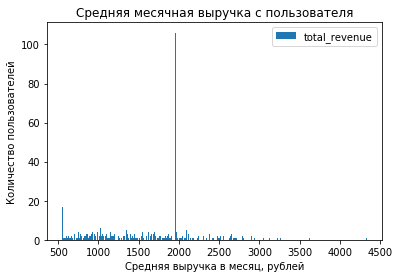

In [32]:
#Определяем среднюю месячную выручку с каждого пользователя
total_data.pivot_table(index='user_id', values='total_revenue', aggfunc='mean')[['total_revenue']].plot.hist(bins=500)
plt.title('Средняя месячная выручка с пользователя')
plt.xlabel('Средняя выручка в месяц, рублей')
plt.ylabel('Количество пользователей')
plt.show()

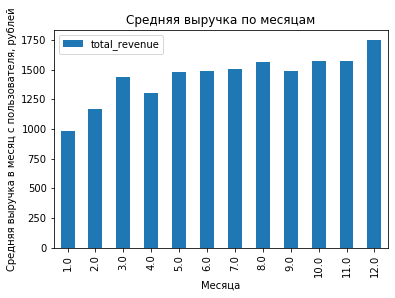

In [33]:
#Определяем среднюю месячную выручку с каждого пользователя
total_data.pivot_table(index='month', values='total_revenue', aggfunc='mean')[['total_revenue']].plot.bar()
plt.title('Средняя выручка по месяцам')
plt.xlabel('Месяца')
plt.ylabel('Средняя выручка в месяц с пользователя, рублей')
plt.show()

Средняя выручка имеет тенденцию расти от начала к концу года

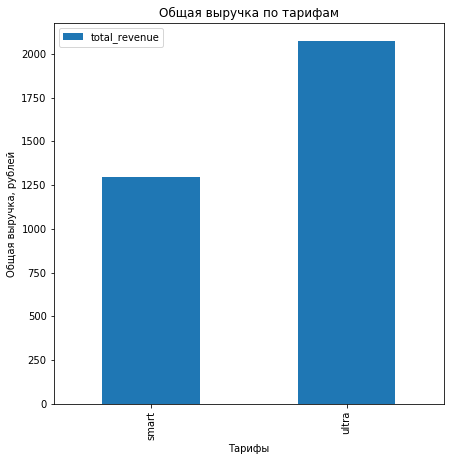

In [34]:
#Определяем среднюю выручку на пользователя по тарифам
total_data.pivot_table(index='tariff', values='total_revenue', aggfunc='mean')[['total_revenue']].plot.bar(figsize=(7, 7))
plt.title('Общая выручка по тарифам')
plt.xlabel('Тарифы')
plt.ylabel('Общая выручка, рублей')
plt.show()

Пользователи тарифа smart чаще докупают услуги, чем пользователи тарифа ultra. Так, несмотря на месячную оплату 500 рублей за smart, пользователь тарифа в среднем приносит более 1250 рублей. А пользователи тарифа ultra в среднем приносят немногим более 2000 рублей (включаю месячную оплату 1950 рублей).

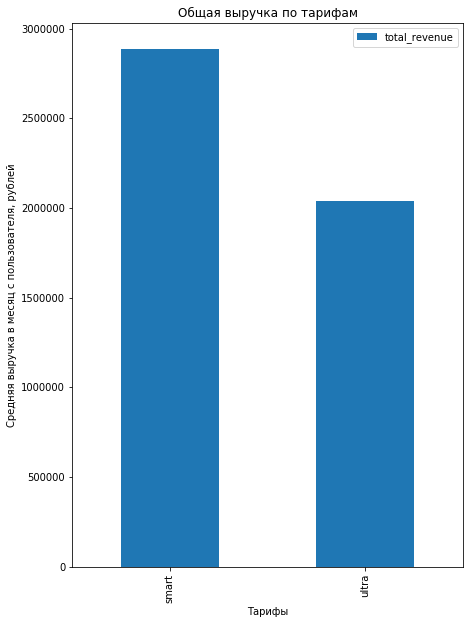

In [35]:
total_data.pivot_table(index='tariff', values='total_revenue', aggfunc='sum')[['total_revenue']].plot.bar(figsize=(7, 10))
plt.title('Общая выручка по тарифам')
plt.xlabel('Тарифы')
plt.ylabel('Средняя выручка в месяц с пользователя, рублей')
plt.show()

Суммарно, пользователи тарифа smart принесли компании почти 2.9 млн рублей, а пользователи тарифа ultra 2.0 млн рублей.

### Вывод

Пиковые зачения средней выручки в месяц относятся к пользователям, которые не приобретают сверх тарифа услуги. Таких с тарифом ultra значительно больше, чем пользователей с тарифом smart. Довольно большая часть выборки находится между значениями 500 и 1950 - всё это пользователи тарифа smart, которые докупают услуги. Средняя выручка в месяц с пользователя растет от января к декабрю. Пользователи тарифа smart в среднем приносят меньше выручки чем пользователи тарифа ultra, но первые чаще докупают дополнительные услуги. В сумме, пользователи тарифа smart приносят болше чем пользователи тарифа ultra.

### <a id='section4'>4. Анализ поведения клиентов</a><br>

#### <a id='section41'>4.1. Сколько минут разговора в месяц требуется пользователям каждого тарифа?</a><br>

In [36]:
#Определяем, сколько в среднем минут разговора в месяц требуется пользователям разных тарифов через сводную таблицу
minutes = total_data.pivot_table(index=['tariff', 'month'], values=['total_duration', 'minutes_included'], aggfunc='mean').reset_index()
display(minutes.head())

,tariff,month,minutes_included,total_duration
0,smart,1.0,500,203.852941
1,smart,2.0,500,298.689655
2,smart,3.0,500,390.051948
3,smart,4.0,500,367.133929
4,smart,5.0,500,387.361702


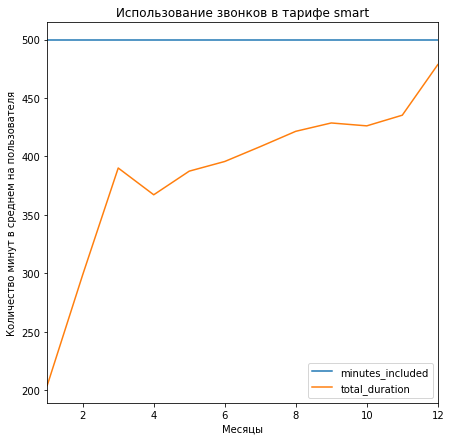

In [37]:
ax = minutes.query('tariff == "smart"').plot(x='month', y='minutes_included', figsize=(7, 7))
minutes.query('tariff == "smart"').plot(x='month', y='total_duration', ax=ax)
plt.title('Использование звонков в тарифе smart')
plt.xlabel('Месяцы')
plt.ylabel('Количество минут в среднем на пользователя')
plt.show()

Пользователи тарифа smart не используют все включенные в тариф минуты

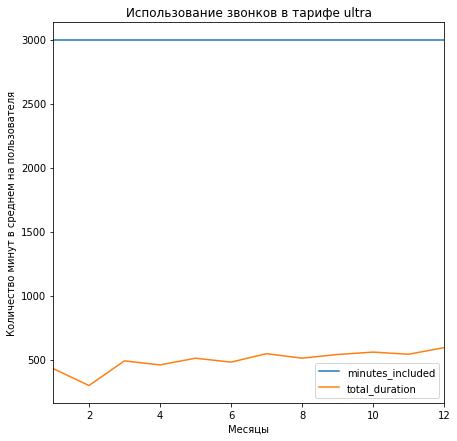

In [38]:
ax1 = minutes.query('tariff == "ultra"').plot(x='month', y='minutes_included', figsize=(7, 7))
minutes.query('tariff == "ultra"').plot(x='month', y='total_duration', ax=ax1)
plt.title('Использование звонков в тарифе ultra')
plt.xlabel('Месяцы')
plt.ylabel('Количество минут в среднем на пользователя')
plt.show()

Пользователи тарифа ultra также не используют все включенные в тариф минуты, но их ежемесячный остаток значительно больше чем у тарифа smart.

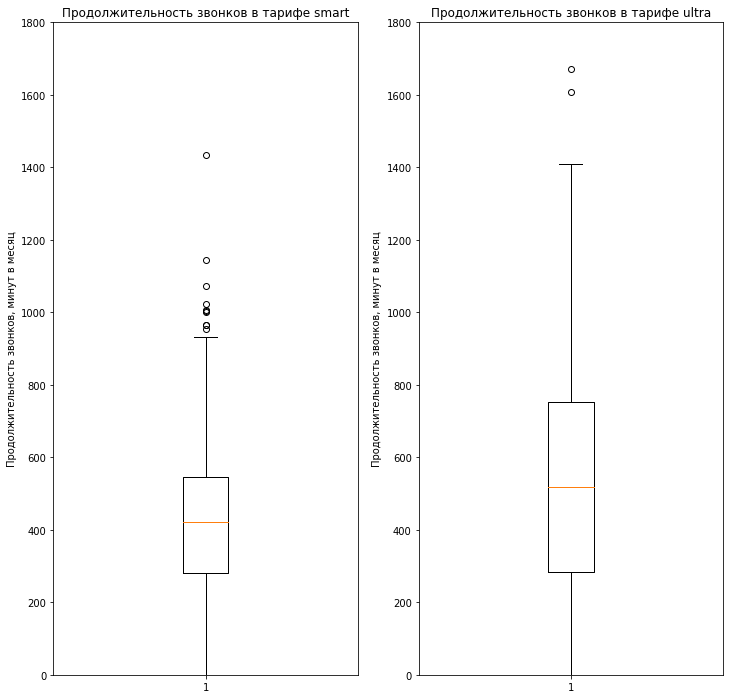

In [39]:
plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
plt.boxplot(total_data.query('tariff == "smart"')['total_duration'])
plt.title("Продолжительность звонков в тарифе smart")
plt.ylabel("Продолжительность звонков, минут в месяц")
plt.ylim(0, 1800)

plt.subplot(1, 2, 2)
plt.boxplot(total_data.query('tariff == "ultra"')['total_duration'])
plt.title("Продолжительность звонков в тарифе ultra")
plt.ylabel("Продолжительность звонков, минут в месяц")
plt.ylim(0, 1800)

plt.show()

In [40]:
display(len(total_data))

3214

In [41]:
#Удаляем выбросы 'total_duration'
total_data = total_data.query('((tariff == "smart") & (total_duration < 1000)) | ((tariff == "ultra") & (total_duration < 1400))')

In [42]:
#Посчитаем среднее значение, дисперсию и стандартное отклонение продолжительности звонков для каждого тарифа
functions = [np.mean, np.var, np.std]
for i in range(len(functions)):
    print(f"{' smart total duration '}{str(functions[i]).split()[1]}: {functions[i](total_data[total_data['tariff'] == 'smart']['total_duration'])}")
    print(f"{' ultra total duration '}{str(functions[i]).split()[1]}: {functions[i](total_data[total_data['tariff'] == 'ultra']['total_duration'])}")

 smart total duration mean: 415.7920792079208
 ultra total duration mean: 522.559633027523
 smart total duration var: 34788.06567983531
 ultra total duration var: 97056.92942045657
 smart total duration std: 186.51559098326152
 ultra total duration std: 311.5396113184591


Как видно из ящиков с усами и применения статистических функций, в среднем в тарифе ultra пользователи отправляют больше сообщений, у тарифа ultra больше показатели стандартного отклонения и дисперсии.

#### <a id='section42'>4.2. Сколько сообщений в месяц требуется пользователям каждого тарифа?</a><br>

In [43]:
#Определяем, сколько в среднем сообщений в месяц требуется пользователям разных тарифов через сводную таблицу
messages = total_data.pivot_table(index=['tariff', 'month'], values=['total_messages', 'messages_included'], aggfunc='mean').reset_index()
display(messages.head())

,tariff,month,messages_included,total_messages
0,smart,1.0,50,18.235294
1,smart,2.0,50,24.086207
2,smart,3.0,50,31.857143
3,smart,4.0,50,30.741071
4,smart,5.0,50,33.773050


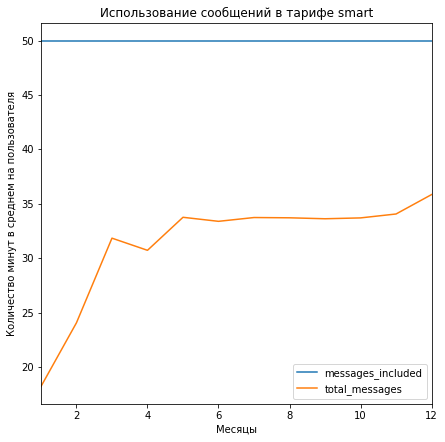

In [44]:
ax2 = messages.query('tariff == "smart"').plot(x='month', y='messages_included', figsize=(7, 7))
messages.query('tariff == "smart"').plot(x='month', y='total_messages', ax=ax2)
plt.title('Использование сообщений в тарифе smart')
plt.xlabel('Месяцы')
plt.ylabel('Количество минут в среднем на пользователя')
plt.show()

Пользователи тарифа smart не используют все включенные в тариф минуты

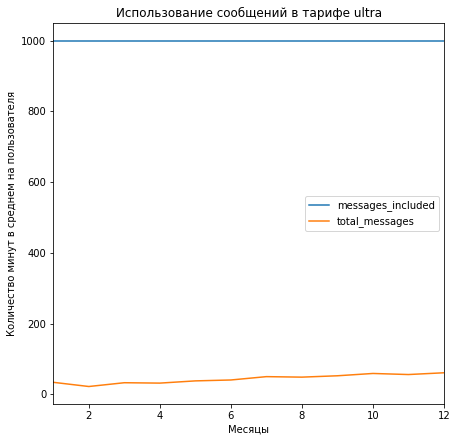

In [45]:
ax3 = messages.query('tariff == "ultra"').plot(x='month', y='messages_included', figsize=(7, 7))
messages.query('tariff == "ultra"').plot(x='month', y='total_messages', ax=ax3)
plt.title('Использование сообщений в тарифе ultra')
plt.xlabel('Месяцы')
plt.ylabel('Количество минут в среднем на пользователя')
plt.show()

Пользователи тарифа ultra также не используют все включенные в тариф минуты, но их ежемесячный остаток значительно больше чем у тарифа smart.

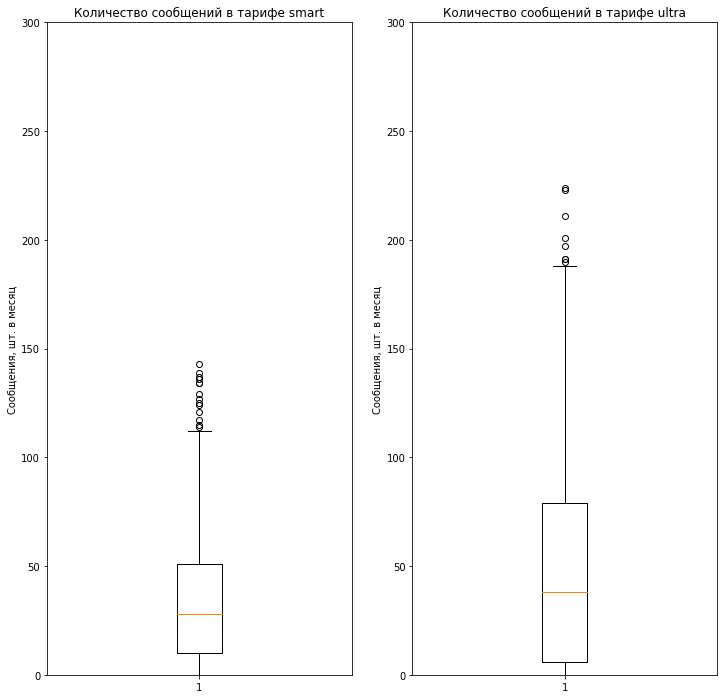

In [46]:
#Построим ящики с усами
plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
plt.boxplot(total_data.query('tariff == "smart"')['total_messages'])
plt.title("Количество сообщений в тарифе smart")
plt.ylabel("Сообщения, шт. в месяц")
plt.ylim(0, 300)

plt.subplot(1, 2, 2)
plt.boxplot(total_data.query('tariff == "ultra"')['total_messages'])
plt.title("Количество сообщений в тарифе ultra")
plt.ylabel("Сообщения, шт. в месяц")
plt.ylim(0, 300)

plt.show()

In [47]:
#Удаляем выбросы 'total_messages'
total_data = total_data.query('((tariff == "smart") & (total_messages < 110)) | ((tariff == "ultra") & (total_messages < 190))')

In [48]:
#Посчитаем среднее значение, дисперсию и стандартное отклонение количества сообщений для каждого тарифа
functions = [np.mean, np.var, np.std]
for i in range(len(functions)):
    print(f"{' smart total messages '}{str(functions[i]).split()[1]}: {functions[i](total_data[total_data['tariff'] == 'smart']['total_messages'])}")
    print(f"{' ultra total messages '}{str(functions[i]).split()[1]}: {functions[i](total_data[total_data['tariff'] == 'ultra']['total_messages'])}")

 smart total messages mean: 32.581479800272355
 ultra total messages mean: 48.07091469681398
 smart total messages var: 731.5252493762374
 ultra total messages var: 2099.025803582651
 smart total messages std: 27.046723449916026
 ultra total messages std: 45.815126362181424


Как видно из ящиков с усами и применения статистических функций, в среднем в тарифе ультра пользователи отправляют больше сообщений, у тарифа ультра больше показатели стандартного отклонения и дисперсии.

#### <a id='section43'>4.3. Какой объем интернет-трафика в месяц требуется пользователям каждого тарифа?</a><br>

In [49]:
#Определяем, сколько в среднем мегабайт интернета в месяц требуется пользователям разных тарифов через сводные таблицы
internet = total_data.pivot_table(index=['tariff', 'month'], values=['total_mb_used', 'mb_per_month_included'], aggfunc='mean').reset_index()
display(internet.head())

,tariff,month,mb_per_month_included,total_mb_used
0,smart,1.0,15360,8524.441176
1,smart,2.0,15360,11611.396552
2,smart,3.0,15360,15296.500000
3,smart,4.0,15360,13479.482143
4,smart,5.0,15360,15825.198582


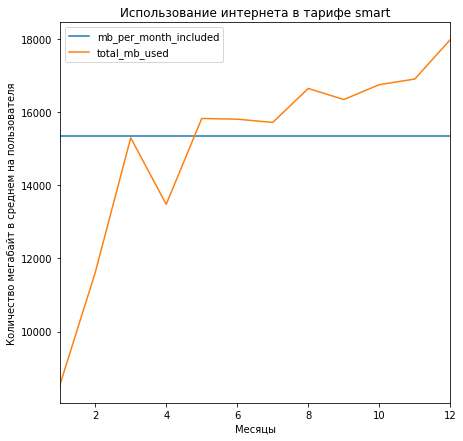

In [50]:
ax4 = internet.query('tariff == "smart"').plot(x='month', y='mb_per_month_included', figsize=(7, 7))
internet.query('tariff == "smart"').plot(x='month', y='total_mb_used', ax=ax4)
plt.title('Использование интернета в тарифе smart')
plt.xlabel('Месяцы')
plt.ylabel('Количество мегабайт в среднем на пользователя')
plt.show()

Пользователям тарифа smart, начиная с апреля недостаточно включенного в тариф интернета и они докупают гигабайты.

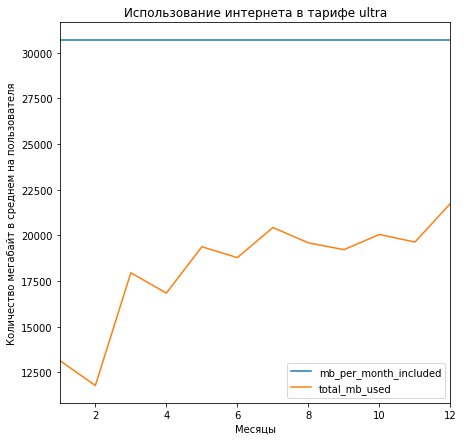

In [51]:
ax5 = internet.query('tariff == "ultra"').plot(x='month', y='mb_per_month_included', figsize=(7, 7))
internet.query('tariff == "ultra"').plot(x='month', y='total_mb_used', ax=ax5)
plt.title('Использование интернета в тарифе ultra')
plt.xlabel('Месяцы')
plt.ylabel('Количество мегабайт в среднем на пользователя')
plt.show()

Пользователи тарифа ultra не расходуют до конца мегабайты интернета, включенные в тариф

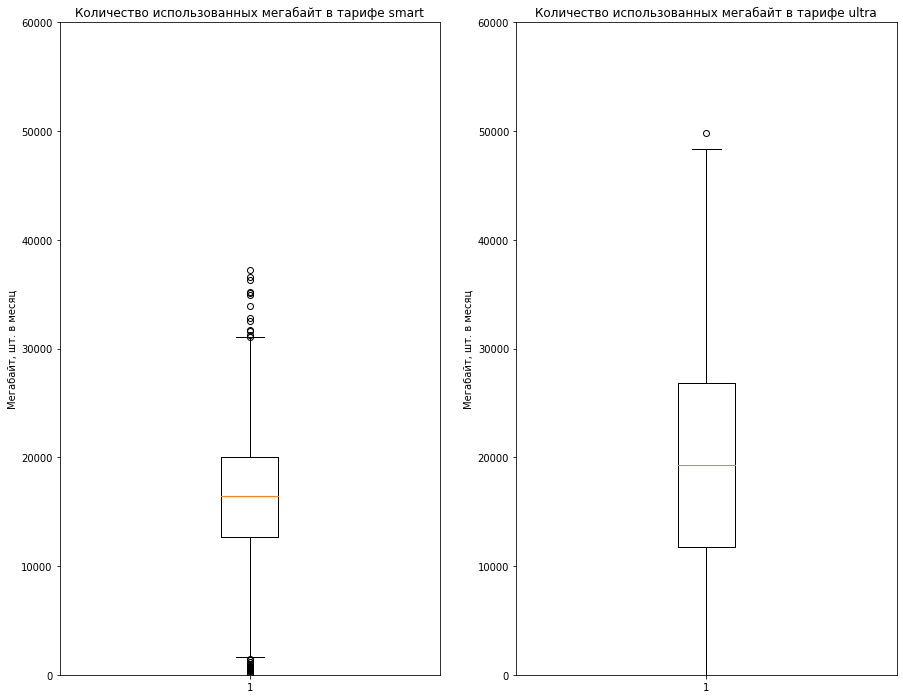

In [52]:
#Построим ящики с усами
plt.figure(figsize=(15, 12))

plt.subplot(1, 2, 1)
plt.boxplot(total_data.query('tariff == "smart"')['total_mb_used'])
plt.title("Количество использованных мегабайт в тарифе smart")
plt.ylabel("Мегабайт, шт. в месяц")
plt.ylim(0, 60000)

plt.subplot(1, 2, 2)
plt.boxplot(total_data.query('tariff == "ultra"')['total_mb_used'])
plt.title("Количество использованных мегабайт в тарифе ultra")
plt.ylabel("Мегабайт, шт. в месяц")
plt.ylim(0, 60000)

plt.show()

In [53]:
#Удаляем выбросы 'total_mb_used'
total_data = total_data.query('((tariff == "smart") & (total_mb_used < 31000) & (total_mb_used > 2000)) | ((tariff == "ultra") & (total_mb_used < 49000))')

In [54]:
#Посчитаем среднее значение, дисперсию и стандартное отклонение количества мегабаайт для каждого тарифа
functions = [np.mean, np.var, np.std]
for i in range(len(functions)):
    print(f"{' smart total mb used '}{str(functions[i]).split()[1]}: {functions[i](total_data[total_data['tariff'] == 'smart']['total_mb_used'])}")
    print(f"{' ultra total mb used '}{str(functions[i]).split()[1]}: {functions[i](total_data[total_data['tariff'] == 'ultra']['total_mb_used'])}")

 smart total mb used mean: 16294.934106728539
 ultra total mb used mean: 19409.02366255144
 smart total mb used var: 29184214.329764806
 ultra total mb used var: 100244679.89141542
 smart total mb used std: 5402.241602313322
 ultra total mb used std: 10012.226520180984


Как видно из ящиков с усами и применения статистических функций, в среднем в тарифе ultra пользователи отправляют больше сообщений, у тарифа ultra больше показатели стандартного отклонения и дисперсии.

### Вывод

в среднем в тарифе ultra пользователи используют минуты, сообщения, мегабайты интернета больше чем пользователи тарифа smart, у тарифа ultra также больше показатели стандартного отклонения и дисперсии. В среднем, пользователи обоих тарифов не используют все включенные в тариф минуты, сообщения и мегабайты. Исключением являются пользователи тарифа smart, которые чаще докупали гигабайты.

### <a id='section5'>5. Проверка гипотез</a><br>

#### <a id='section51'>5.1. Нулевая гипотеза 1: средняя выручка пользователей тарифов «Ультра» и «Смарт» равна</a><br>

In [55]:
#Определяем дисперсию выручки тарифов smart и ultra
print('Дисперсия выручки smart:', np.var(total_data.query('tariff == "smart"')['total_revenue']), 'Дисперсия выручки ultra:', np.var(total_data.query('tariff == "ultra"')['total_revenue']))

Дисперсия выручки smart: 561083.7297271224 Дисперсия выручки ultra: 133291.80003048317


In [56]:
#Проводим тест с учетом того, что дисперсии не равны (параметр equal_var). Пороговое значение задаем 0.05
alpha = 0.05
results = st.ttest_ind(
    total_data.query('tariff == "smart"')['total_revenue'],
    total_data.query('tariff == "ultra"')['total_revenue'],
    equal_var=False)
print('\t', 'p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('\t', 'Отвергаем нулевую гипотезу')
else:
    print('\t', 'Не получилось отвергнуть нулевую гипотезу')

	 p-значение:  2.1516331443877735e-283
	 Отвергаем нулевую гипотезу


Нулевая гипотеза" средняя выручка пользователей тарифов «Ультра» и «Смарт» верна" отвергнута.


#### <a id='section52'>5.2. Нулевая гипотеза 2: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов</a><br>

In [57]:
#Отделяем пользователей Москвы от других городов. Поскольку выбросы удаляли в датасетах smart и ultra, будем проверять гипотезу на данных датасетах
msk_data = total_data.query('city == "Москва"')
other_cities_data = total_data.query('city != "Москва"')
print('\t', 'Пользователей для анализа в Москве:', (len(msk_data)), '\n','\t','Пользователей для анализав других городах:', (len(other_cities_data)))

	 Пользователей для анализа в Москве: 603 
 	 Пользователей для анализав других городах: 2524


In [58]:
#Определяем дисперсию выручки для пользователей из Москвы и других городов
print('Дисперсия выручки в Москве:', np.var(msk_data['total_revenue']), 'Дисперсия выручки в других городах:', np.var(other_cities_data['total_revenue']))

Дисперсия выручки в Москве: 525700.3867231009 Дисперсия выручки в других городах: 573997.2767905131


In [59]:
#Проводим тест с учетом того, что дисперсии примерно равны (параметр equal_var). Пороговое значение задаем 0.05
alpha = 0.05
results = st.ttest_ind(
    msk_data['total_revenue'],
    other_cities_data['total_revenue'],
    equal_var=True)
print('\t', 'p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('\t', 'Отвергаем нулевую гипотезу')
else:
    print('\t', 'Не получилось отвергнуть нулевую гипотезу')


	 p-значение:  0.26566231045233674
	 Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу: "средняя выручка пользователей из Москвы равна от выручки пользователей из других регионов" не получилось отвергнуть.

### Вывод

Нулевая гипотеза № 1 отвергнута, Нулевая гипотеза № 2 не отвергнута.

### <a id='section6'>Общий вывод</a>

В данном исследовании изучено 5 таблиц с данным пользователей тарифов. Встречаются аномальные значения длительной продолжительности вызовов, большого количества сообщений и интернет-сессий с больших расходом мегабайт.  Встречаются также нулевые значения продолжительности вызовов и расходования мегабайт, что может быть связано с некорректным учетом использования услуг (например, исходящие вызовы, для которых не установлено соединение либо проблемы с оборудованием пользователя/провайдера). Часть пользователей вообще не отправляли сообщения. Бюджетный тариф smart преобладает: 349 из 500 пользователей выбрали его. Топ-5 городов, где находятся пользователи выборки это Москва, Санкт-Петербург, Новосибирск, Омск, Казань. Недоступные значения даты отказа от тарифа (ввиду того, что тариф еще активен) заменены на 0. В столбцах с датами во всех таблицах формат заменен на datetime.
Пиковые зачения средней выручки в месяц относятся к пользователям, которые не приобретают сверх тарифа услуги. Таких с тарифом ultra значительно больше, чем пользователей с тарифом smart. Довольно большая часть выручки в выборке находится между значениями 500 и 1950 - всё это пользователи тарифа smart, которые докупают услуги. Средняя выручка в месяц с пользователя растет от января к декабрю. В среднем в тарифе ultra пользователи используют минуты, сообщения, мегабайты интернета больше чем пользователи тарифа smart, у тарифа ultra также больше показатели стандартного отклонения и дисперсии. В среднем, пользователи обоих тарифов не используют все включенные в тариф минуты, сообщения и мегабайты. Исключением являются пользователи тарифа smart, которые чаще докупали гигабайты. Нулевая гипотеза № 1 " средняя выручка пользователей тарифов «Ультра» и «Смарт» равна" отвергнута. Нулевую гипотезу № 2 "средняя выручка пользователей из Москвы равна выручке пользователей из других регионов" не получилось отвергнуть. 

Рекомендации для компании: 
1. Сфокусироваться на продвижении тарифа "Ультра", поскольку выручка больше
2. Поскольку выручка в Москве и других городах равна, геотаргетинг рекламы должен быть с максимальным охватом